In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz 
from graphviz import Digraph

In [2]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

In [3]:
Traindf = pd.read_csv('Train.csv', index_col = 0)
Trainy = Traindf.Life_expectancy
TrainX = Traindf.drop('Life_expectancy', axis=1)

le = preprocessing.LabelEncoder()
Trainy = le.fit_transform(Trainy)
Trainy_Original = le.inverse_transform(Trainy)

clf = tree.DecisionTreeClassifier()#max_depth = 7)
clf = clf.fit(TrainX, Trainy)

Predict_Train = clf.predict(TrainX)
Predict_Train_Original = le.inverse_transform(Predict_Train)

C:\Users\xuxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\xuxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\xuxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\xuxia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_spl

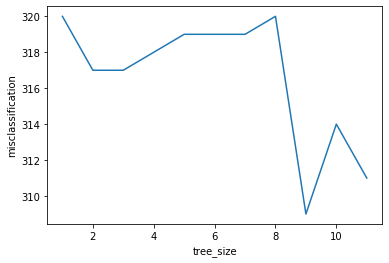

In [4]:
misclassification = []
for i in range(1,12):
    #print(i)
    parameters = {'max_depth':range(i,i+1)}
    clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters)#, n_jobs=4
    clf.fit(TrainX, Trainy)
    tree_model = clf.best_estimator_
    misclassification.append(clf.best_score_)
for i in range(len(misclassification)):
    misclassification[i] = int((1-misclassification[i])*len(Traindf))
    
#print(misclassification)
tree_size = [1,2,3,4,5,6,7,8,9,10,11]

plt.plot(tree_size, misclassification)
plt.xlabel('tree_size')
plt.ylabel('misclassification')
plt.show()

In [5]:
Traindf = pd.read_csv('Train.csv', index_col = 0)
Trainy = Traindf.Life_expectancy
TrainX = Traindf.drop('Life_expectancy', axis=1)

le = preprocessing.LabelEncoder()
Trainy = le.fit_transform(Trainy)
Trainy_Original = le.inverse_transform(Trainy)

clf = tree.DecisionTreeClassifier(max_depth = 9)
clf = clf.fit(TrainX, Trainy)

Predict_Train = clf.predict(TrainX)
Predict_Train_Original = le.inverse_transform(Predict_Train)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.981753 to fit


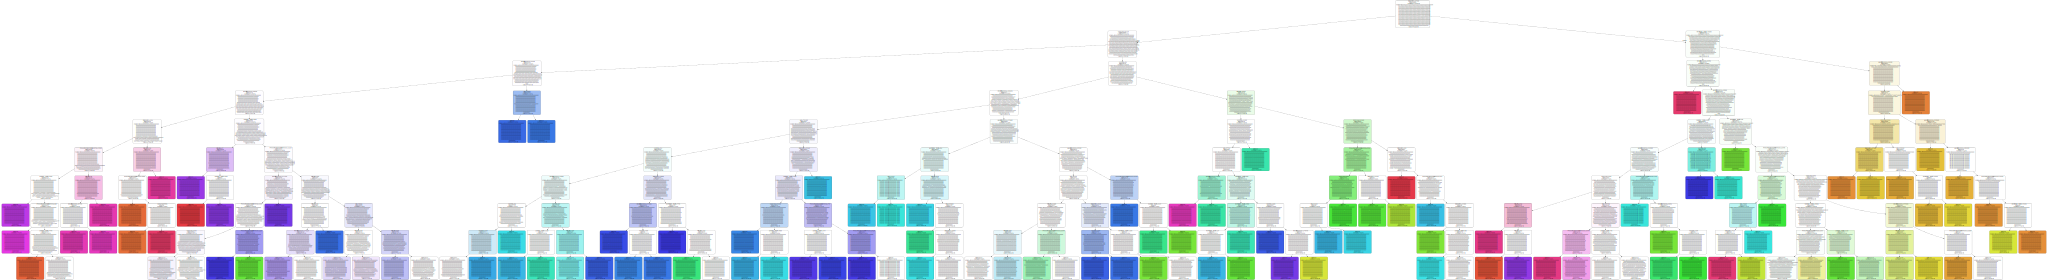

In [6]:
freatureName = ['Suicide_Rate','Homicide_Rate','Pneumonia and Influenza','Firearm','Vehicle','Heart Disease','Diabetes','HIV','Cancer']
classname = []
for i in Trainy_Original:
    year = str(i) + 'yrs'
    classname.append(year)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=freatureName, class_names=classname,  filled=True, rounded=True, proportion=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render(filename='DecisionTreesvg')
graph.format = 'gif'
graph.render(filename='DecisionTreegif')
graph

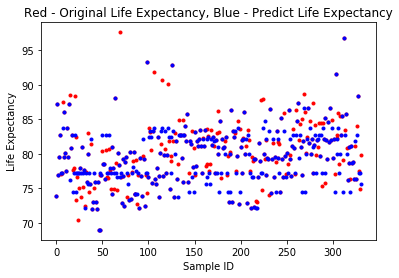

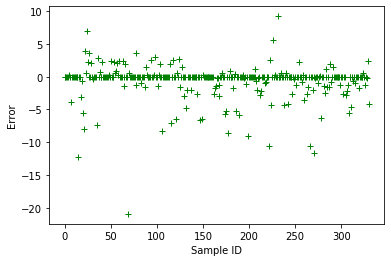

DescribeResult(nobs=331, minmax=(0.0, 20.89999999999999), mean=1.1586102719033229, variance=5.654493820379013, skewness=3.5645349589960458, kurtosis=18.00490276757567)

In [7]:
CLFerrorlist, CLF_abs_errorlist = errorCalculate(Trainy_Original,Predict_Train_Original)
plt.plot(Trainy_Original, 'r.')
plt.plot(Predict_Train_Original, 'b.')
plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
plt.show()
plt.plot(CLFerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
np.savetxt("DT_Train_P.csv", Predict_Train_Original.transpose(), delimiter=",")
stats.describe(CLF_abs_errorlist)

In [8]:
Testdf = pd.read_csv('Test.csv', index_col = 0)
Testy_Original = Testdf.Life_expectancy
Testy_Original = Testy_Original.to_numpy()
TestX = Testdf.drop('Life_expectancy', axis=1)

Predict_Test = clf.predict(TestX)
Predict_Test_Original = le.inverse_transform(Predict_Test)

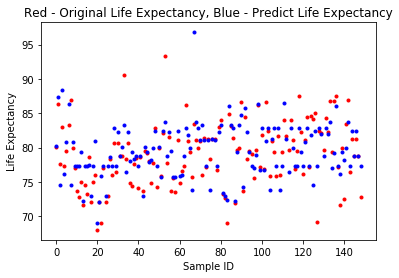

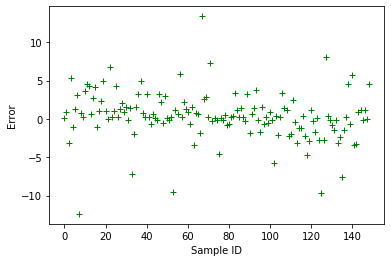

DescribeResult(nobs=149, minmax=(0.0, 13.399999999999991), mean=2.073154362416106, variance=5.647923090876112, skewness=2.142426973659433, kurtosis=5.6035236889262094)

In [9]:
CLFerrorlist, CLF_abs_errorlist = errorCalculate(Testy_Original,Predict_Test_Original)
plt.plot(Testy_Original, 'r.')
plt.plot(Predict_Test_Original, 'b.')
plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
plt.show()
plt.plot(CLFerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
np.savetxt("DT_Test_P.csv", Predict_Test_Original.transpose(), delimiter=",")
stats.describe(CLF_abs_errorlist)

In [10]:
stats.describe(Predict_Test_Original)

DescribeResult(nobs=149, minmax=(69.0, 96.8), mean=79.42281879194631, variance=14.983259568293125, skewness=0.47712392691214617, kurtosis=1.8418083015403797)